# Week 3 Tutorial Notes

## Advanced Aggregation

### Importing Libraries

First, we will import pandas as usual.

In [1]:
import pandas as pd 

##### Read the file into a DataFrame called titanic using the pandas library and print out the first 5 rows.

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0000,NaN,First,woman,False,B,NaN,yes,True
858,1,3,female,24.0,0,3,19.2583,C,Third,woman,False,NaN,Cherbourg,yes,False
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
847,0,3,male,35.0,0,0,7.8958,C,Third,man,True,NaN,Cherbourg,no,True
641,1,1,female,24.0,0,0,69.3000,C,First,woman,False,B,Cherbourg,yes,True


<div styles = "test-align: justify">As per last week, <code>.head()</code> is used to display the first five rows of the dataframe object. However, this week, another function <code>.sample()</code> is used, and passing in an int will provide 'int' random rows to display</div>

## 1. Data Aggregation

Right now, we are just defining a dictionary, that will soon be used in our <code>.agg()</code> function. Please do take note that the <code>.agg()</code> function can take in other data types as well, not only dictionaries. 
<br>
<br>
Further reading: <nobr>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html</nobr>

In [5]:
target = {"who": "count", "age": "mean"}

In [6]:
groupbyClass = titanic.groupby('class').agg(target)

In [7]:
groupbyClass

,who,age
class,,
First,216,38.233441
Second,184,29.877630
Third,491,25.140620


In [8]:
groupbyClass.rename(columns = {"who" : "passengers", "age": "average age"}, inplace = True)

In [9]:
groupbyClass = groupbyClass.reset_index()

In [10]:
groupbyClass

,class,passengers,average age
0,First,216,38.233441
1,Second,184,29.877630
2,Third,491,25.140620


#### Practice 1a: Modify the aggregation operation 'target' above so that it also finds the age of the oldest and youngest passengers in each class. Note that all aggregate operations being applied to the same column need to be placed within the same set of curly braces '{}' and separated by commas ','. So fill in the [MISSING] parts of the function and also attempt to rename the columns:


In [11]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [12]:
target = {"who" : "count", "age":{"mean", "min", "max"}}

In [13]:
groupBy = titanic.groupby('class').agg(target)

In [14]:
groupBy

who   age                 
       count   min       mean   max
class                              
First    216  0.92  38.233441  80.0
Second   184  0.67  29.877630  70.0
Third    491  0.42  25.140620  74.0

In [15]:
groupBy = groupBy.droplevel(0, axis = 1)

In [16]:
groupBy

,count,min,mean,max
class,,,,
First,216,0.92,38.233441,80.0
Second,184,0.67,29.877630,70.0
Third,491,0.42,25.140620,74.0


In [17]:
groupBy.reset_index()

,class,count,min,mean,max
0,First,216,0.92,38.233441,80.0
1,Second,184,0.67,29.877630,70.0
2,Third,491,0.42,25.140620,74.0


In [18]:
groupBy.rename(columns = 
               {"count": "passengers", 
                "mean": "average age", 
                "max":"maximum age","min":
                "minimum age"}, inplace = True)

In [19]:
groupBy

,passengers,minimum age,average age,maximum age
class,,,,
First,216,0.92,38.233441,80.0
Second,184,0.67,29.877630,70.0
Third,491,0.42,25.140620,74.0


In [20]:
groupBy.reset_index()

,class,passengers,minimum age,average age,maximum age
0,First,216,0.92,38.233441,80.0
1,Second,184,0.67,29.877630,70.0
2,Third,491,0.42,25.140620,74.0


## 1.2 Custom aggregation operations

This part of the tutorial is known as custom aggregation operations because of the lambda function. So far when we use <code>.agg()</code> the dictionary that we pass as parameters are in-built functions. Like <code>.mean</code> or <code>.max</code>

Lambda functions are anonymous functions, a function without a name.   
```Python
#Imagine you are going to create a custom function 
def lambdaTest(x):
    res = []
    for e in x:
        if e > 50:
            res += [1]
    return sum(res)
#This is exactly the same as doing...
lambdaTest = lambda x : sum(e > 50 for e in x)
```
Kinda weird isn't it, why do we put function names like nunique as a string instead in the dictionary? It's just how pandas syntax is. Pandas is written in Python, Cython and C. And this is necessary to perform different mapping methods that allows you to call a function using dictionaries.  

In [21]:
target2 = {'age':{'nunique', lambda x: sum(e > 50 for e in x)}}

In [22]:
groupByClass3 = titanic.groupby('class').agg(target2).reset_index()

In [23]:
groupByClass3

class        age        
          <lambda_0> nunique
0   First       39.0      57
1  Second       15.0      57
2   Third       10.0      68

In [24]:
groupByClass3 = groupByClass3.droplevel(0, axis = 1)

In [25]:
groupByClass3.rename(columns = {"": 'class', "nunique":'unique age', "<lambda_0>":'pass > 50'})

,class,pass > 50,unique age
0,First,39.0,57
1,Second,15.0,57
2,Third,10.0,68


#### Practice 2: Interpret the output and discuss your findings with other students.


From the data above, I conclude that FIT1043 is stupid 

## 2. Data Visualization

Yay finally we get to see data yay

## Importing Libraries

In order to visualize data in Python, we will have to use the matplotlib.pyplot interface library. Oh no, what's an interface? Goodluck lmao imagine if they actually explained. To understand why we import matplotlib.pyplot instead of matplotlib you have to understand Object-Oriented Programming, which is out of scope of your current syllabus. 

In [26]:
import matplotlib.pyplot as plt 
import matplotlib as mpl
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [27]:
%matplotlib inline
mpl.rcParams['figure.dpi'] = 100

### 2.1 Basic Plots
You can use the .plot() function to plot a simple lines graph of a certain column. 

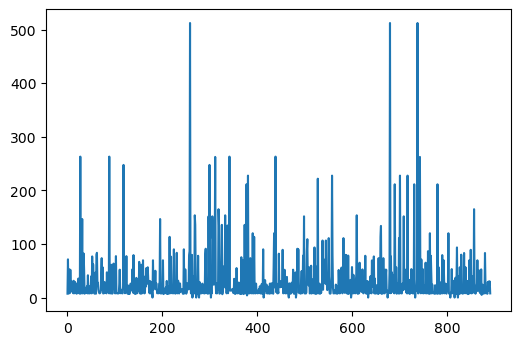

In [28]:
plt.plot(titanic['fare'])

#### Practice 3: How many passengers were there in total?
I guess we can kinda use the .shape attribute to find out. Note how .shape has no ()'s, this is because we are accessing an attribute/property of an object instead of invoking a method. 

In [29]:
titanic.shape

(891, 15)

We can tell by the first value, 891, number of rows, as the number of passengers.

Or if you want a more, 'data science' way, we can do this instead by counting a whole column.

In [30]:
titanic['who'].count()

891

### Histograms? Sure, why not
We want to visualize a histogram representation of fare column for each passenger.

In [31]:
titanic['fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64

You'll notice that there's a bunch of other stuff, which will help make your whole histogram neater. Remember, your plt. 's have to be in the same cell where the histogram is created. 

Text(0.5, 1.0, 'Histogram of fares paid')

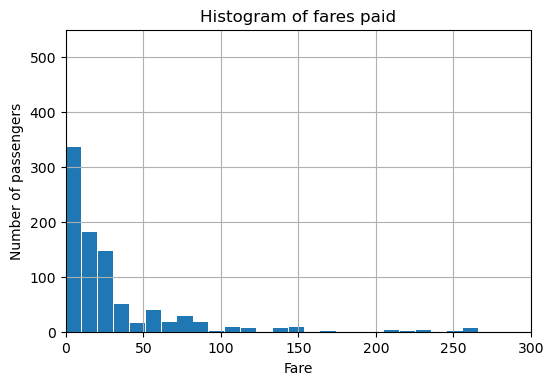

In [32]:
titanic.fare.hist(bins = 50, rwidth = 0.95)
plt.xlim(0, 300)
plt.ylim(0, 550)
plt.xlabel("Fare")
plt.ylabel("Number of passengers")
plt.title("Histogram of fares paid")

### Box plots
As you may recall, box plot shows information regarding minimum, maximum, Q1, Q2, and Q3's 

(0.0, 600.0)

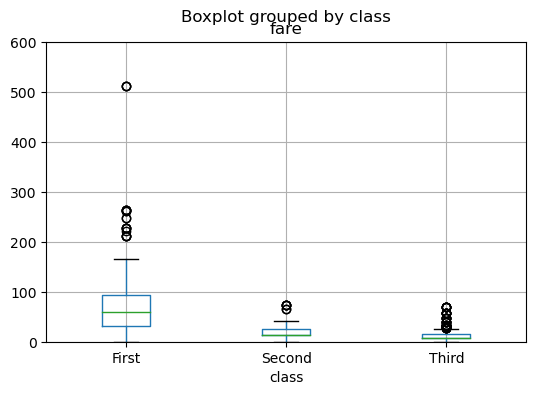

In [33]:
titanic.boxplot(column = 'fare', by = 'class')
plt.ylim(0, 600)

<AxesSubplot:title={'center':'fare'}, xlabel='class'>

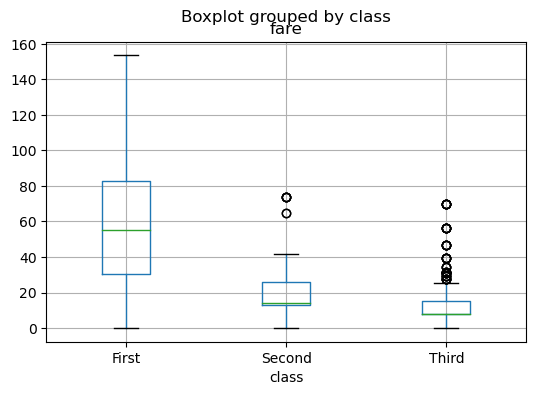

In [34]:
filt = ~((titanic['class'] == 'First') & (titanic['fare'] > 160))
titanic = titanic[filt]
titanic.boxplot(column = 'fare', by = 'class')

#### Practice 6a: Fill in the missing code to make the aggregation function below count the number of children (age under 18) and adults (age 18 or over) in the different classes

#### Practice 6b: Now follow the steps from Section 2.2 to group the 'titanic' data by class, and apply the above aggregation function to it. Call the resulting DataFrame 'groupbyClass2' and display it:


In [35]:
# Tutorial on Moodle uses lambda functions, I am using a normal
# function here in case you feel “challenged” by the lambda function :)
fun_child_adult = {'age':{lambda x: sum(e < 18 for e in x), lambda y: sum(e >= 18 for e in y)}}
groupbyClass2 = titanic.groupby('class').agg(fun_child_adult)
groupbyClass2
# The column names will be meaningless, so you may want to rename them.
groupbyClass2.rename(
columns = {
'<lambda_0>':'child count',
'<lambda_1>':'adult count'
},
inplace = True)
groupbyClass2.droplevel(0, axis = 1).reset_index()

,class,child count,adult count
0,First,11.0,155.0
1,Second,23.0,150.0
2,Third,78.0,277.0


Text(0.5, 1.0, 'Passengers ticket class based on their adulthood')

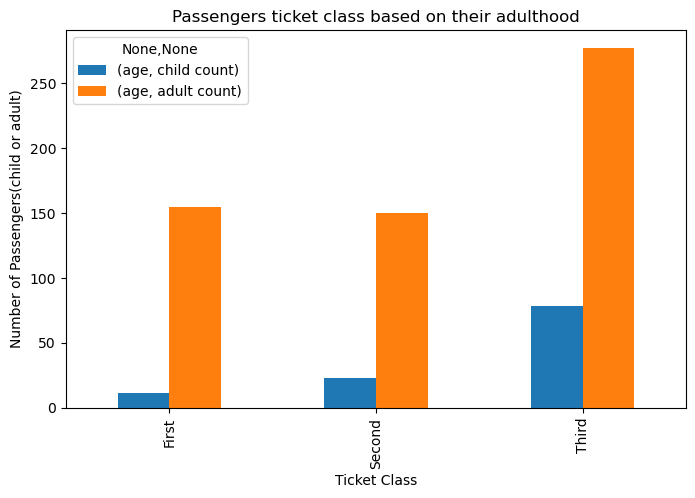

In [36]:
ax=groupbyClass2.plot.bar(figsize=(8,5))
# figsize sets size of plot
# use values of column 'class' as the x axis labels. Remove this line of code to see what will happen if we do not have this line
plt.xlabel('Ticket Class')
# setting a label for x axis
plt.ylabel('Number of Passengers(child or adult)')
# Setting a label for y axis
plt.title('Passengers ticket class based on their adulthood')
# Setting the title of chart